In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
uni = pd.read_csv('/content/wine.csv')
uni.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
uni.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7d309c7c5180>,
 'caps': [<matplotlib.lines.Line2D at 0x7d309c7c60e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d30a0c1e1a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7d309c7c6710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d309c7c6500>,
 'means': []}

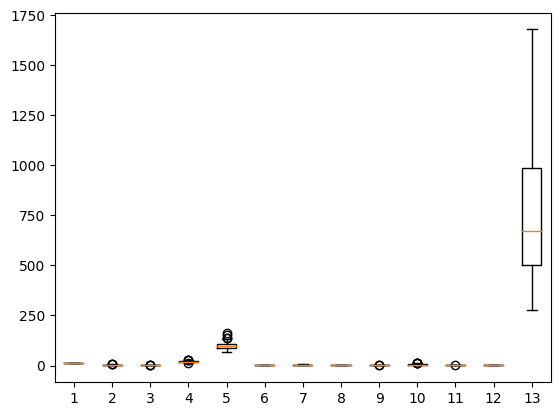

In [ ]:
plt.boxplot(uni)

(array([[178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   5.,  41.,  43.,  31.,  15.,  20.,  16.,   4.,   3.]]),
 array([1.300000e-01, 1.681170e+02, 3.361040e+02, 5.040910e+02,
        6.720780e+02, 8.

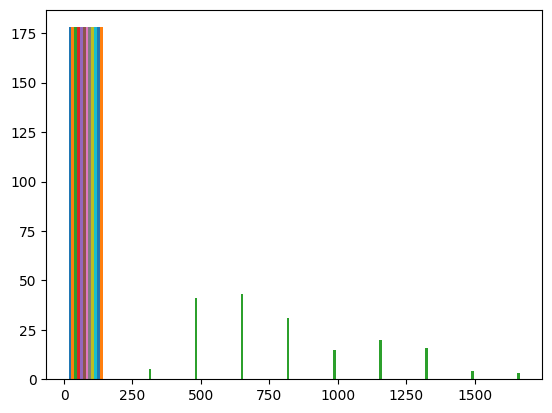

In [ ]:
plt.hist(uni)

In [ ]:
uni.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [ ]:
# Considering only numerical data
uni = uni.iloc[:,1:] # exclude 0th column i.e. univ. name
uni.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Normalizing the numerical data
std = StandardScaler()
uni_normal=std.fit_transform(uni)
uni_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
pca=PCA()
pca_components=pca.fit_transform(uni_normal)

In [ ]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [ ]:
# in percentage - The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [ ]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

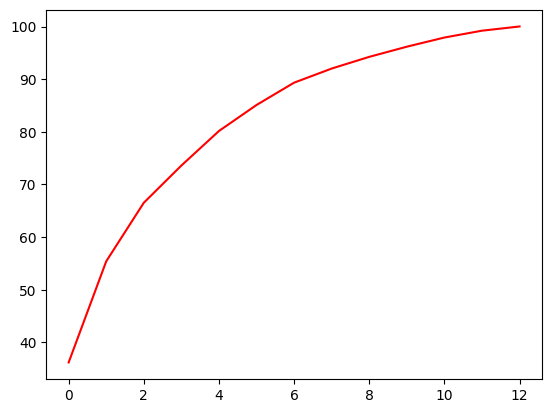

In [ ]:
plt.plot(var1, color="red")

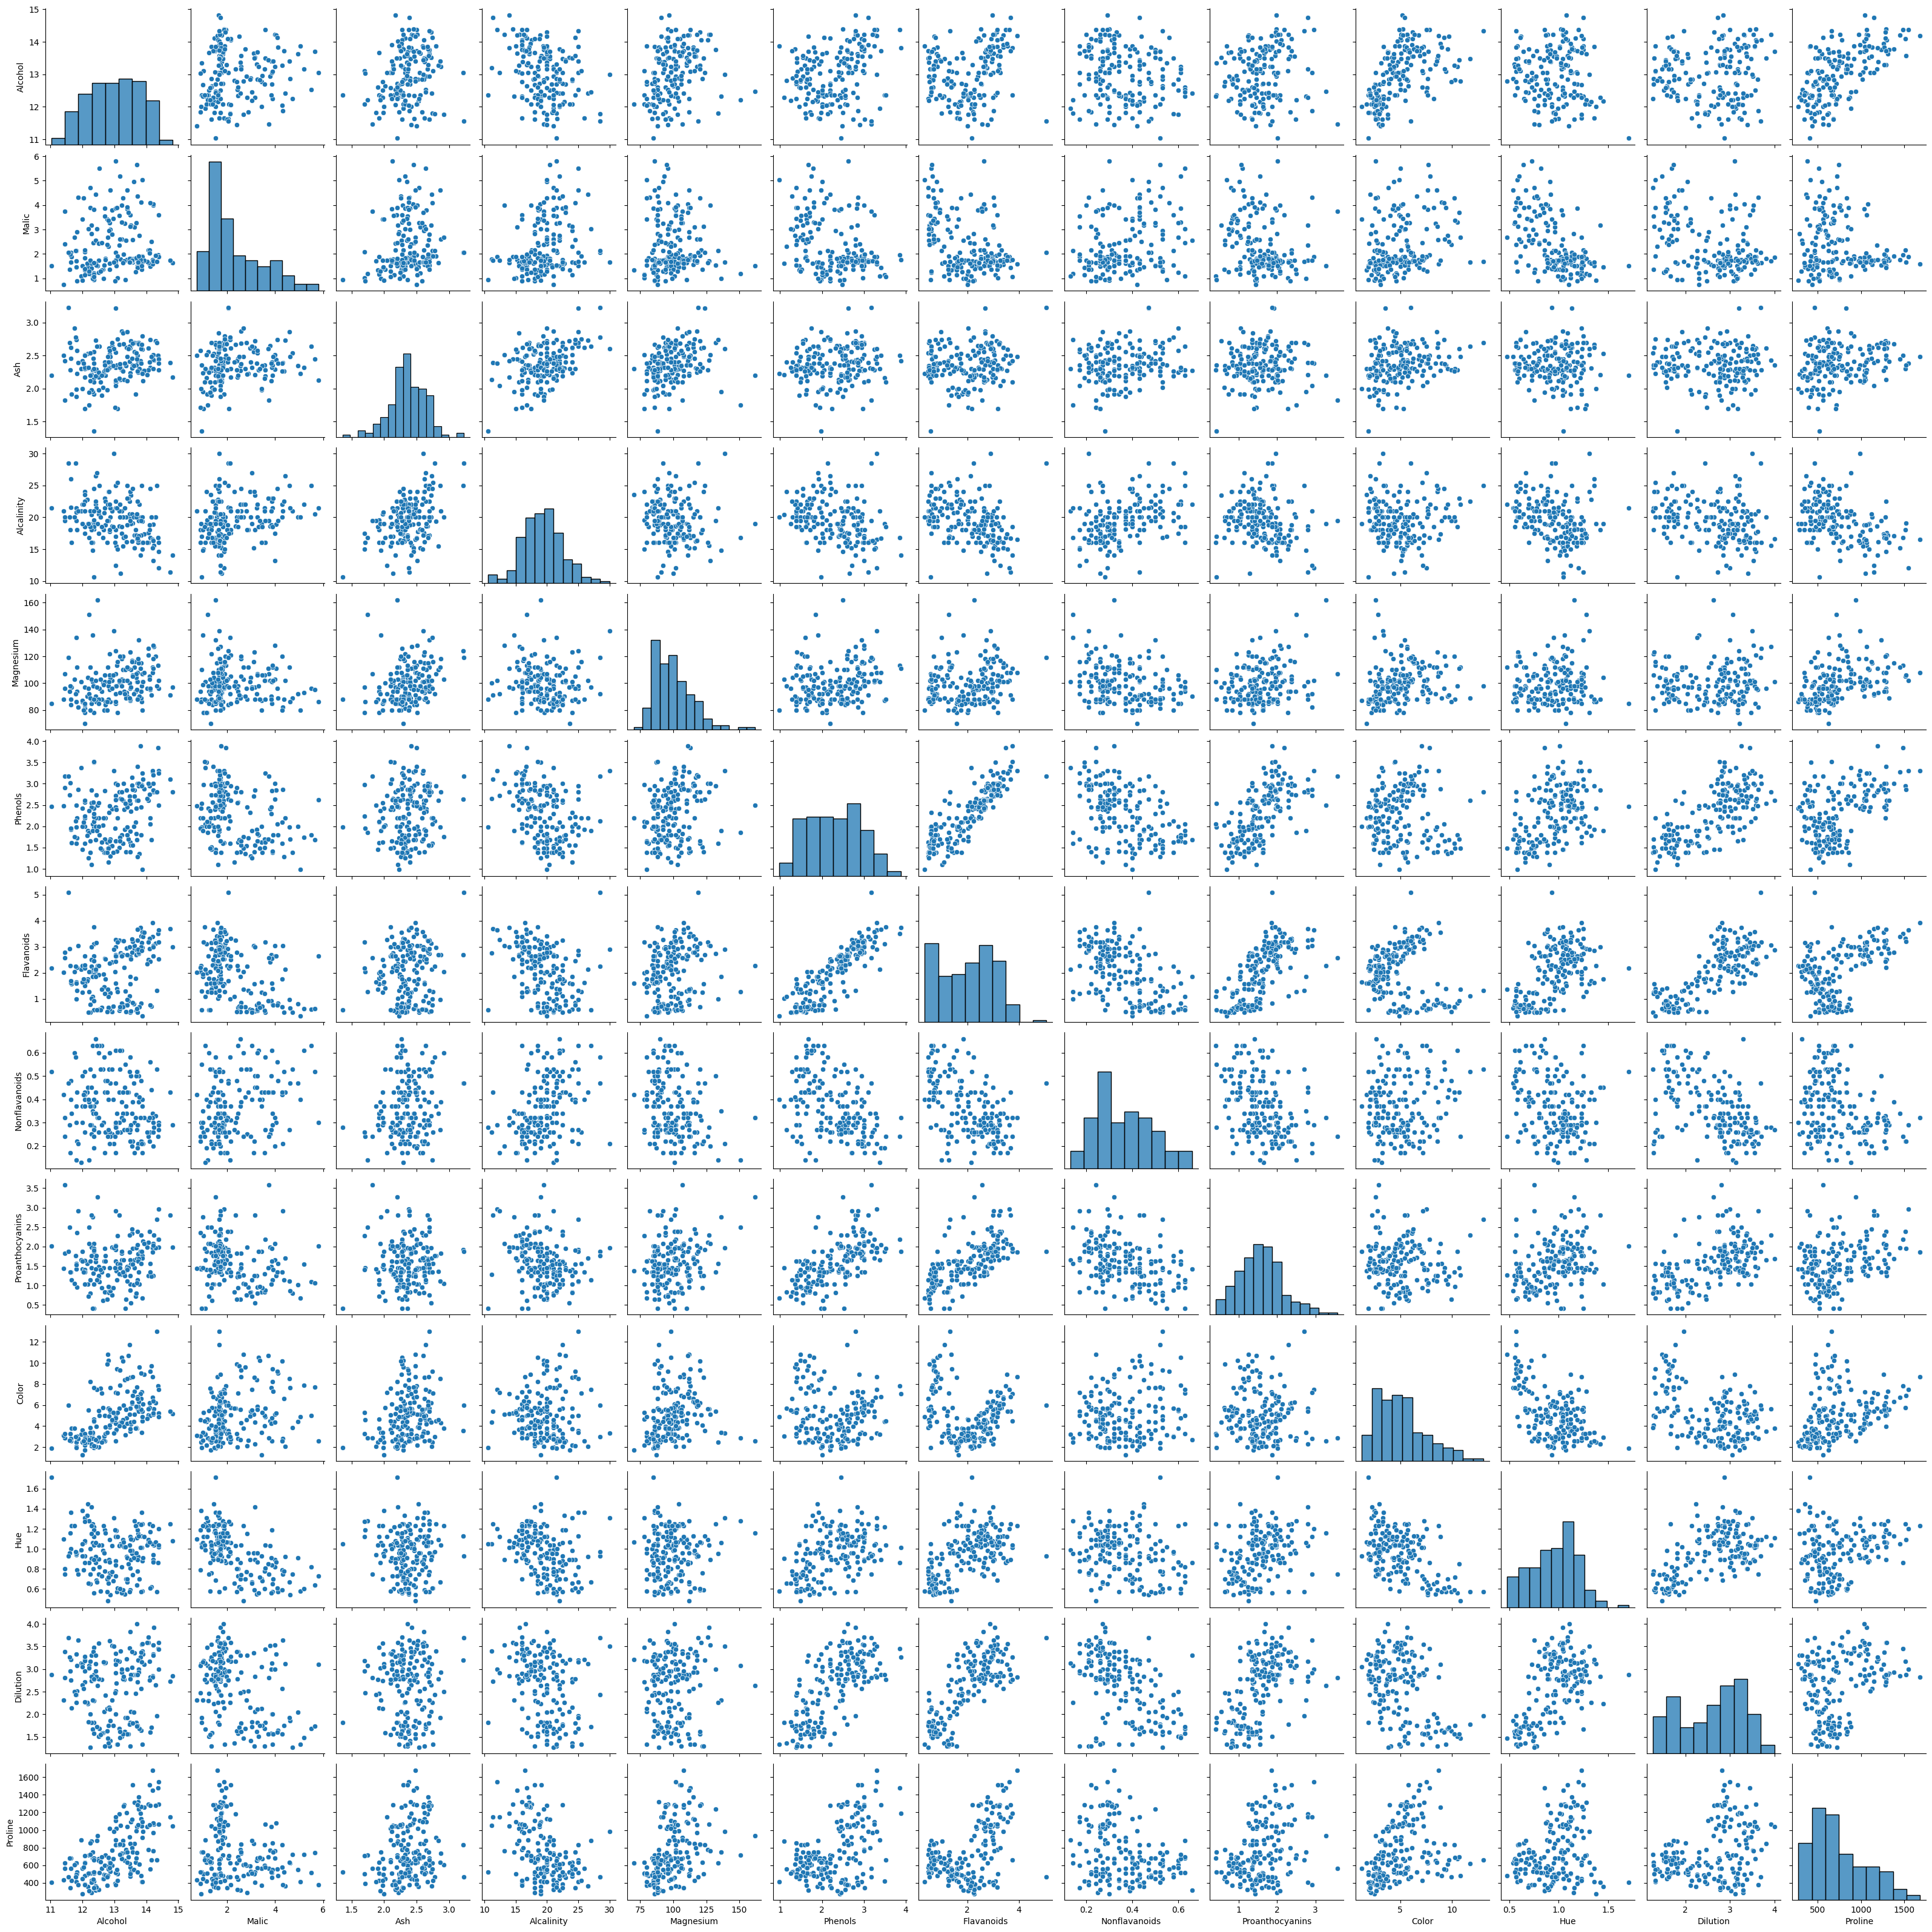

In [ ]:
import seaborn as sns
sns.pairplot(uni)

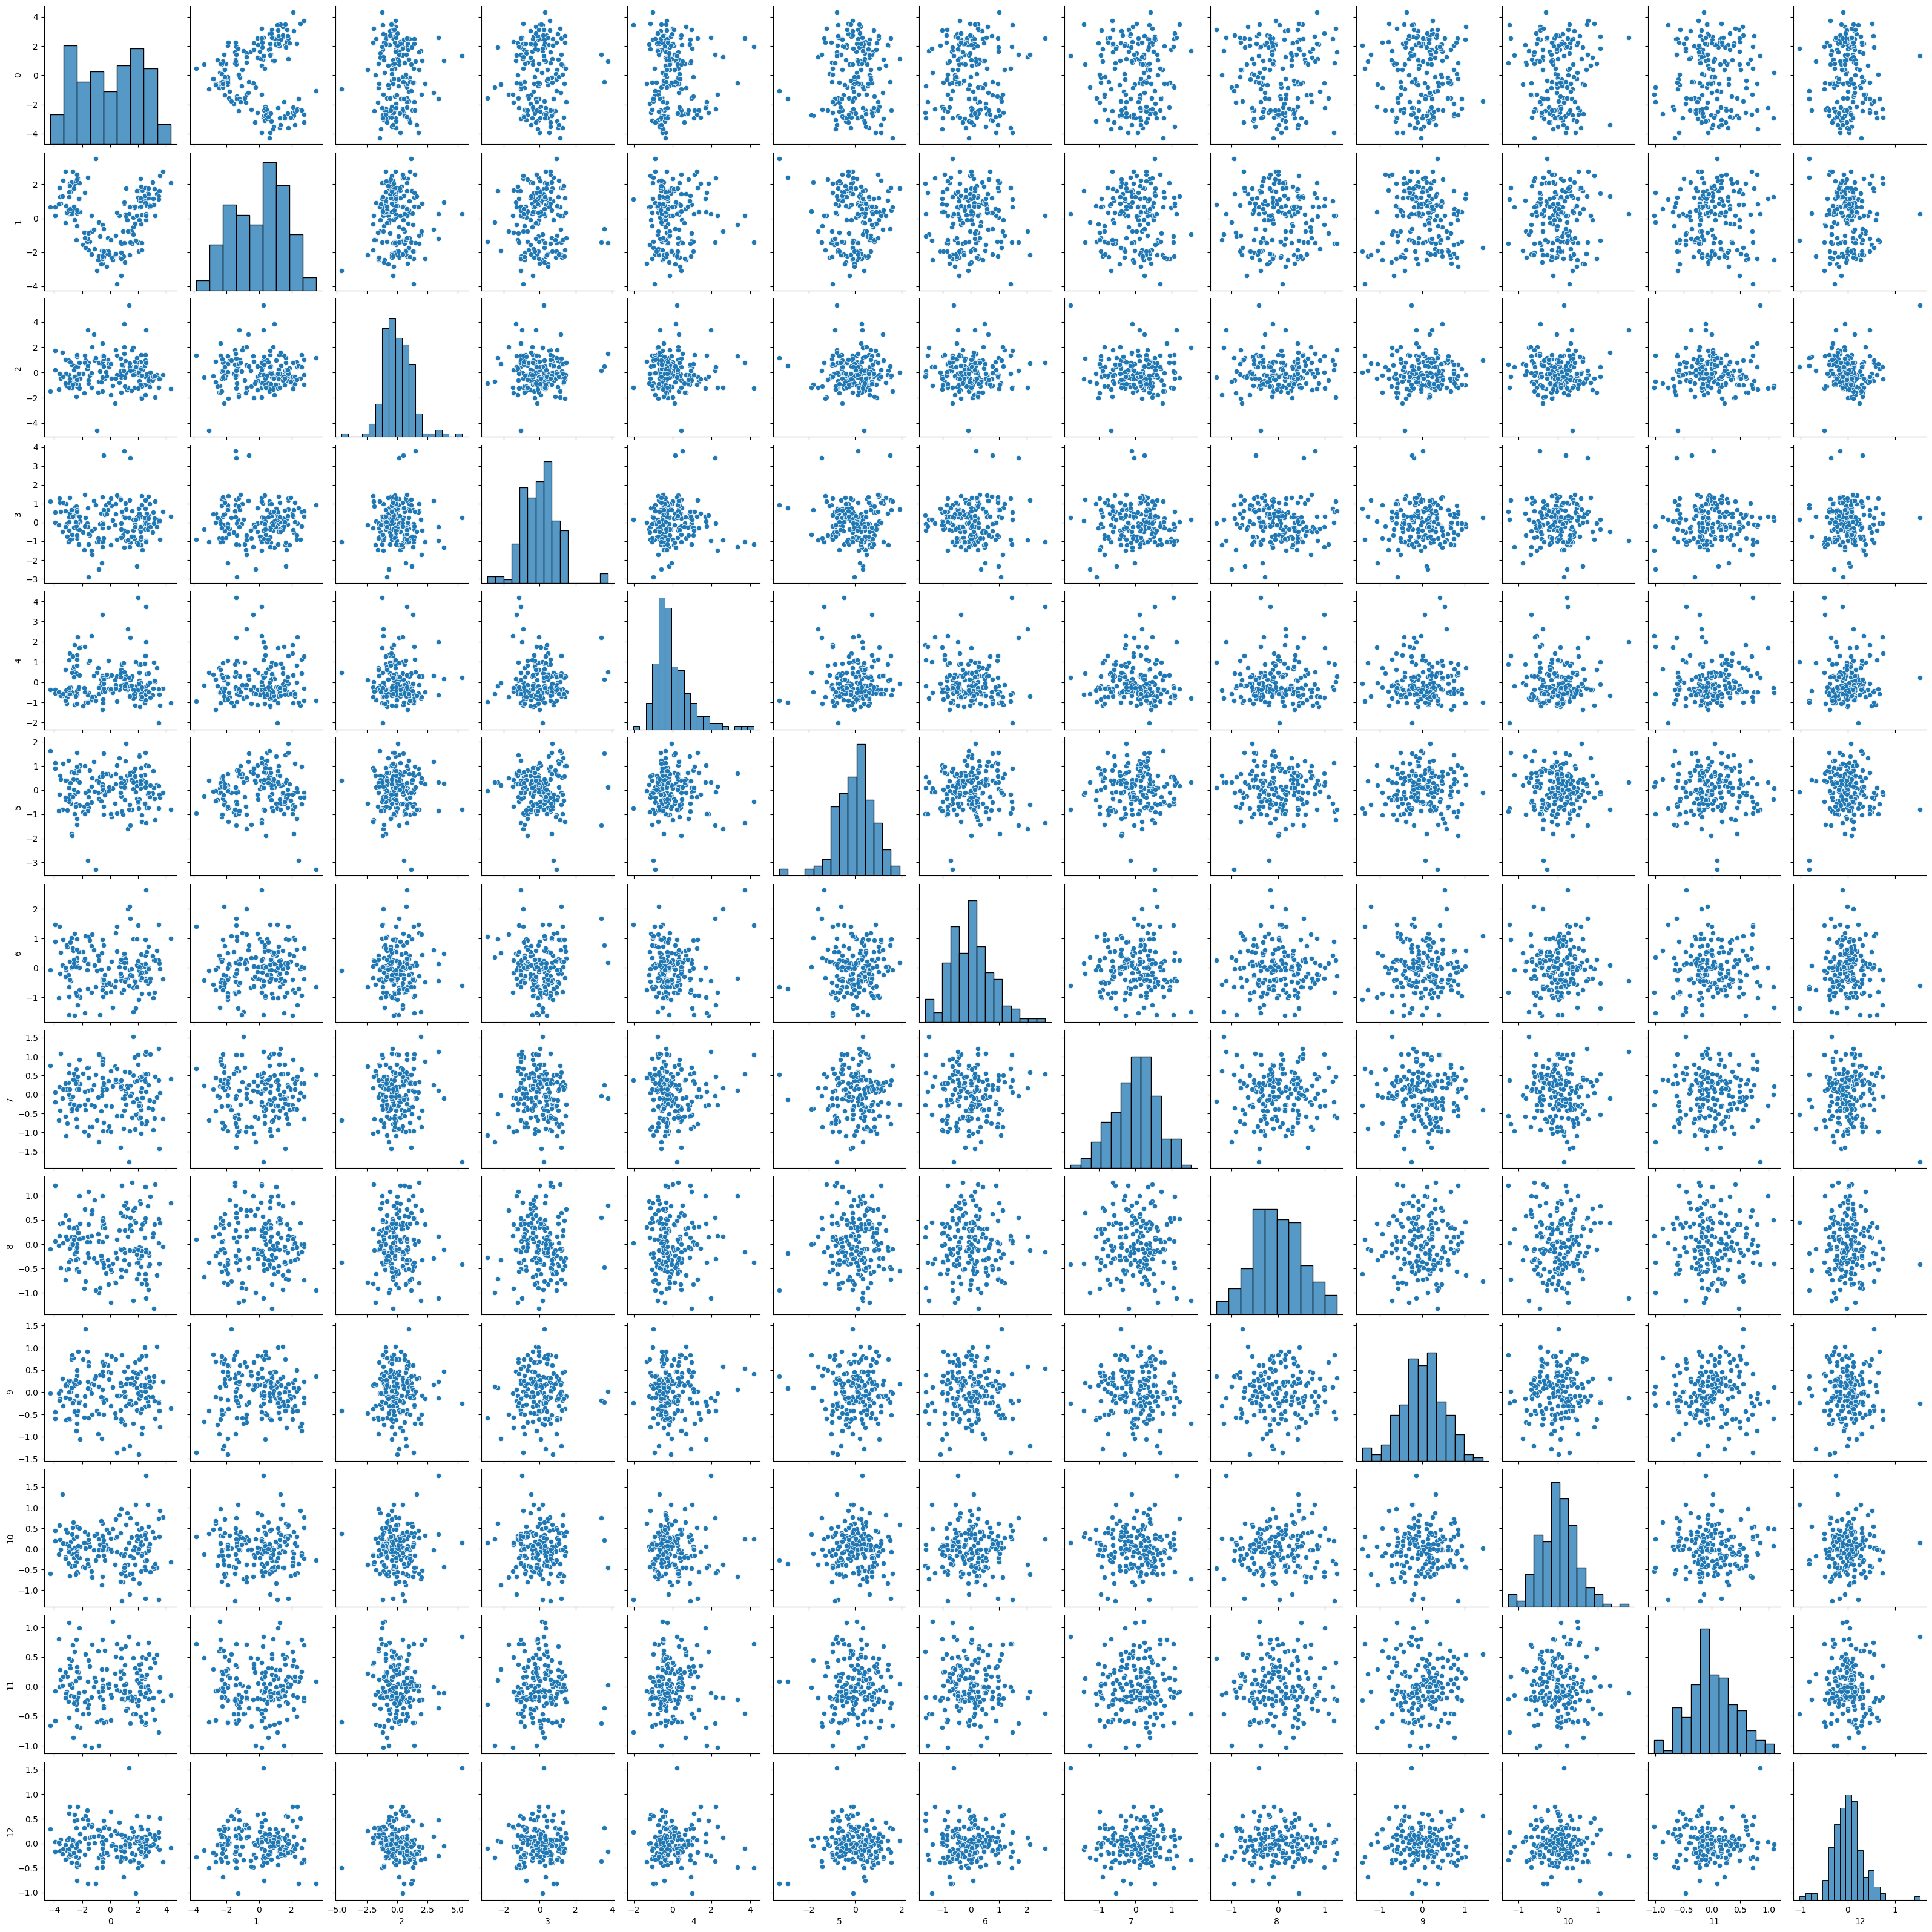

In [ ]:
sns.pairplot(pd.DataFrame(pca_components))